In [10]:
#1. Reproduce the complete workbook over colab and give screen shot of that before class end (3:15)
#2. Try predicting "D"



#Input Data
# A 
a =[0, 0, 1, 1, 0, 0, 
0, 1, 0, 0, 1, 0, 
1, 1, 1, 1, 1, 1, 
1, 0, 0, 0, 0, 1, 
1, 0, 0, 0, 0, 1] 
# B 
b =[0, 1, 1, 1, 1, 0, 
0, 1, 0, 0, 1, 0, 
0, 1, 1, 1, 1, 0, 
0, 1, 0, 0, 1, 0, 
0, 1, 1, 1, 1, 0] 
# C 
c =[0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 0, 0, 0, 0,  
    0, 1, 1, 1, 1, 0] 

# d = [] 5 x 6

# Creating labels 
y =[[1, 0, 0], 
[0, 1, 0], 
[0, 0, 1]] 


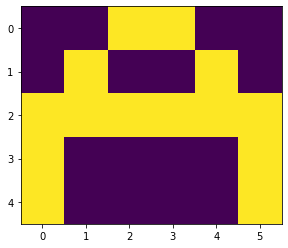

In [11]:
#Checking & Visualization
import numpy as np 
import matplotlib.pyplot as plt 
# visualizing the data, ploting A. 
plt.imshow(np.array(a).reshape(5, 6)) 
plt.show() 


In [12]:
# converting data and labels into numpy array 

""" 
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network, 
these vectors are then stored in a list x. 
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)] 


# Labels are also converted into NumPy array 
y = np.array(y) 


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [13]:



# def testmycode:
#     serial block of code:
        
        
        
        
        
#         ////
#     parallel block of code:
        
        
#         ///
        

# f = pb
# (1-f) = sb













# activation function 

def sigmoid(x): 
	return(1/(1 + np.exp(-x))) 
	
# Creating the Feed forward neural network 
# 1 Input layer(1, 30) 
# 1 hidden layer (1, 5) 
# 1 output layer(3, 3) 

def f_forward(x, w1, w2): 
	# hidden 
	z1 = x.dot(w1)# input from layer 1  
                                        # z1 = x.dot(w1) x = input, w1 = weights 
                                        # np.dot(x, w1) x=input, w1=weights, np.dot(self.input, self.weights1))
	a1 = sigmoid(z1)# out put of layer 2 
	
    # a1 = sigmoid(x.dot(w1))

    # Output layer 
	z2 = a1.dot(w2)# input of out layer 
	a2 = sigmoid(z2)# output of out layer 
	return(a2) 

# initializing the weights randomly 
def generate_wt(x, y): 
	l =[] 
	for i in range(x * y): #for i in range (10): 1-- 9 values i generate 
		l.append(np.random.randn()) 
	return(np.array(l).reshape(x, y)) 
	
# for loss we will be using mean square error(MSE) 
def loss(out, Y): 
	s =(np.square(out-Y)) #difference
	s = np.sum(s)/len(y) # sum /12 total count
	return(s) 
	
# Back propagation of error 
def back_prop(x, y, w1, w2, alpha): 
	
	# hiden layer 
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	
	# Output layer 
	z2 = a1.dot(w2)# input of out layer 
	a2 = sigmoid(z2)# output of out layer 
	# error in output layer 
	d2 =(a2-y) 
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1))) 

	# Gradient for w1 and w2 
	w1_adj = x.transpose().dot(d1) 
	w2_adj = a1.transpose().dot(d2) 
	
	# Updating parameters 
	w1 = w1-(alpha*(w1_adj)) 
	w2 = w2-(alpha*(w2_adj)) 
	
	return(w1, w2) 

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10): 
	acc =[] 
	losss =[] 
	for j in range(epoch): 
		l =[] 
		for i in range(len(x)): 
			out = f_forward(x[i], w1, w2) 
			l.append((loss(out, Y[i]))) 
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha) 
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100) 
		losss.append(sum(l)/len(x)) 
	return(acc, losss, w1, w2) 

def predict(x, w1, w2): 
	Out = f_forward(x, w1, w2) 
	maxm = 0
	k = 0
	for i in range(len(Out[0])): 
		if(maxm<Out[0][i]): 
			maxm = Out[0][i] 
			k = i 
	if(k == 0): 
		print("Image is of letter A.") 
	elif(k == 1): 
		print("Image is of letter B.") 
	else: 
		print("Image is of letter C.") 
	plt.imshow(x.reshape(5, 6)) 
	plt.show()	 
	



In [14]:
w1 = generate_wt(30, 5) 
w2 = generate_wt(5, 3) 
print(w1, "\n\n", w2)


[[ 0.9467874   0.26647242 -0.60438909 -0.09965787 -0.28165403]
 [ 1.00517288 -1.26830982  1.67094146  0.79587673 -1.84106643]
 [ 0.96871062  2.23576734  0.27769244  1.07689404 -0.66268137]
 [-1.50259143 -1.74042134  0.74146035 -1.20270119  0.27826613]
 [-0.3486999   1.03449371 -0.55117517  0.58352682  0.5540843 ]
 [ 0.70819534 -1.41172976 -0.75975881  0.12134845 -0.01746579]
 [-0.70554024  2.11178124  0.39103297 -1.39314616  2.14015254]
 [-1.61043389 -0.85103713  1.82924873 -0.065875   -0.72316848]
 [-1.82512856  0.95397441 -1.95035377 -0.77446551  0.07789541]
 [-0.62218043 -0.90330953 -1.04773902 -0.30154309  0.3792909 ]
 [-0.59798648 -2.07666525 -1.50741396  1.59005368 -0.0960407 ]
 [-1.52317996 -0.08303513  1.35392252 -0.29148284  0.8679234 ]
 [-1.05231592  1.44958242  1.58911474 -0.01792733 -1.44044614]
 [-0.79252239 -0.1967316   2.2328466   0.3844116  -0.07510742]
 [-0.38078793 -0.54886439  0.15300812 -0.44241819  1.46529436]
 [-0.12560825 -0.40773086 -2.0325195   0.39193953 -0.92

In [15]:
"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the 
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 60.28389421283373
epochs: 2 ======== acc: 62.78395864453936
epochs: 3 ======== acc: 65.16532455696607
epochs: 4 ======== acc: 67.40079322142755
epochs: 5 ======== acc: 69.44986138352958
epochs: 6 ======== acc: 71.27587605902784
epochs: 7 ======== acc: 72.85568819779765
epochs: 8 ======== acc: 74.184117816479
epochs: 9 ======== acc: 75.273778634877
epochs: 10 ======== acc: 76.15111041914112
epochs: 11 ======== acc: 76.85053715907902
epochs: 12 ======== acc: 77.40873915874359
epochs: 13 ======== acc: 77.86030405980647
epochs: 14 ======== acc: 78.23518137449088
epochs: 15 ======== acc: 78.55772946049103
epochs: 16 ======== acc: 78.84682978348296
epochs: 17 ======== acc: 79.1165305462629
epochs: 18 ======== acc: 79.37683745083442
epochs: 19 ======== acc: 79.63445456237868
epochs: 20 ======== acc: 79.89341901308286
epochs: 21 ======== acc: 80.15565299747576
epochs: 22 ======== acc: 80.4214823686656
epochs: 23 ======== acc: 80.69015518174051
epochs: 24 ======== acc: 8

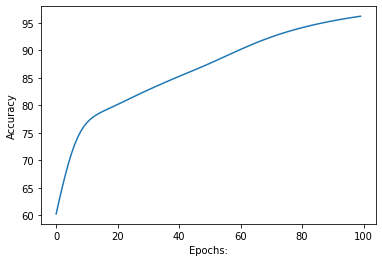

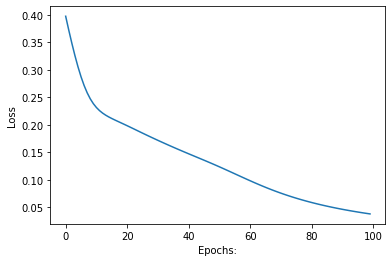

In [16]:
import matplotlib.pyplot as plt1 

# ploting accuraccy 
plt1.plot(acc) 
plt1.ylabel('Accuracy') 
plt1.xlabel("Epochs:") 
plt1.show() 

# plotting Loss 
plt1.plot(losss) 
plt1.ylabel('Loss') 
plt1.xlabel("Epochs:") 
plt1.show()


In [17]:
# the trained weigths are 
print(w1, "\n", w2)


[[ 0.9467874   0.26647242 -0.60438909 -0.09965787 -0.28165403]
 [ 1.41680685 -1.54749192  1.60956058  1.00422016 -1.89213574]
 [ 1.40164797  2.20562383  0.21631893  1.13116593 -0.43940729]
 [-1.06965409 -1.77056486  0.68008685 -1.14842929  0.50154021]
 [ 0.06293407  0.75531161 -0.61255605  0.79187025  0.50301499]
 [ 0.70819534 -1.41172976 -0.75975881  0.12134845 -0.01746579]
 [-0.70554024  2.11178124  0.39103297 -1.39314616  2.14015254]
 [-1.17749655 -0.88118065  1.76787522 -0.01160311 -0.4998944 ]
 [-1.82512856  0.95397441 -1.95035377 -0.77446551  0.07789541]
 [-0.62218043 -0.90330953 -1.04773902 -0.30154309  0.3792909 ]
 [-1.59992461 -1.82756341 -1.56826352  1.64510562  0.32965192]
 [-1.52317996 -0.08303513  1.35392252 -0.29148284  0.8679234 ]
 [-1.03101255  1.698621    1.58912211 -0.17199886 -1.16610276]
 [-0.35958505 -0.22687511  2.17147309  0.43868349  0.14816666]
 [-1.38272607 -0.29976256  0.09215856 -0.38736625  1.89098698]
 [-1.12754638 -0.15862903 -2.09336906  0.44699147 -0.50

Image is of letter C.


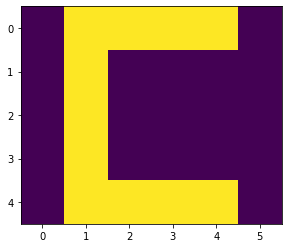

In [20]:
""" 
The predict function will take the following arguments: 
1) image matrix 
2) w1 trained weights 
3) w2 trained weights 
"""
predict(x[2], w1, w2)
